# DATA ANALYSIS FOR TWO CAB FIRMS

#### Hypothesis
<strong>1</strong>: Does one cab firm dominate the other in terms of profit?<br />
<strong>2</strong>: Does the profit come equally from all cities?<br />
<strong>3</strong>: Is there a relationship between gender and cab firm selection?<br />
<strong>4</strong>: Is customer reach equal for both firms?<br />


In [1]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Reading all csv files and storing them into respective variables

cab = pd.read_csv('Cab_Data.csv')

city = pd.read_csv('City.csv')

customer_id = pd.read_csv('Customer_ID.csv')

transaction_id = pd.read_csv('Transaction_ID.csv')

## Getting Familiar with the datasets

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [6]:
cab.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [7]:
cab.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [8]:
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'])
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [10]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [11]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [12]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [13]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [14]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [16]:
customer_id['Customer ID'].unique()

array([29290, 27703, 28712, ..., 41414, 41677, 39761])

In [17]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [18]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Merging All Data Frames into a single final Data Frame for convinience

In [19]:
df = pd.merge(cab,transaction_id,on='Transaction ID')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [20]:
df = pd.merge(df,customer_id, on='Customer ID')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [21]:
df = pd.merge(df,city, on='City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

## Copying the final dataframe, for safe side.

In [23]:
df1 = df.copy()
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [24]:
df1['Profit'] = df1['Price Charged']-df1['Cost of Trip'] #Calculating Profit as Selling Price minus Costs.
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808


In [25]:
df1['Profit/km'] = df1['Profit']/df1['KM Travelled'] #Calculating Profit/km.
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit/km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,1.882266
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,10.739870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,4.574571
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,0.826904
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,6.981330


In [26]:
df1['Year'] = pd.DatetimeIndex(df1['Date of Travel']).year #Adding another column to dataframe consisting only of years.
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit/km,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,1.882266,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,10.739870,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,4.574571,2018
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,0.826904,2016
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,6.981330,2018


In [27]:
df1['Price/Km'] = df1['Price Charged']/df1['KM Travelled'] #Calculating Price/km
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit/km,Year,Price/Km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,1.882266,2016,12.182266
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,10.739870,2018,22.859870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,4.574571,2018,18.614571
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,0.826904,2016,12.526904
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,6.981330,2018,19.821330


## Data Visualization Begins

In [28]:
# Setting the color palette for visualization

colors = ["#AA336A","#FFFF00"]
sns.set_palette(sns.color_palette(colors))

In [29]:
df2 = df1[['Year','Profit','Profit/km','Company']]
df2.head()

,Year,Profit,Profit/km,Company
0,2016,57.3150,1.882266,Pink Cab
1,2018,281.2772,10.739870,Yellow Cab
2,2018,194.6480,4.574571,Yellow Cab
3,2016,23.6660,0.826904,Pink Cab
4,2018,253.9808,6.981330,Yellow Cab


Text(0, 0.5, 'Average Profit/Km')

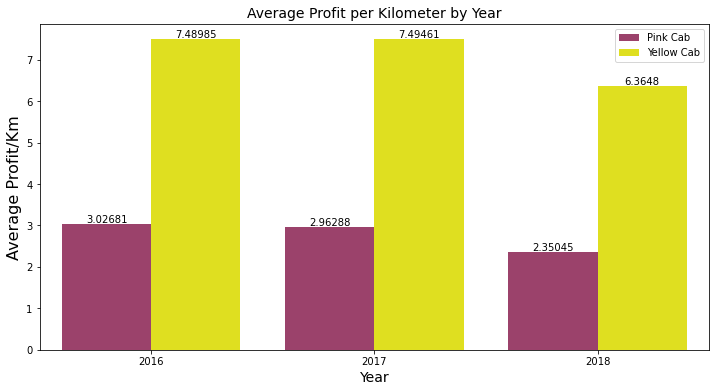

In [30]:
ig = plt.figure(figsize = (12,6))
ax = sns.barplot(x='Year', y='Profit/km',data = df2, hue = 'Company',ci=None)
plt.legend(loc = 'upper right')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Average Profit per Kilometer by Year', fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Average Profit/Km", fontsize = 16)

Text(0.5, 1.0, 'Average Profit by Year')

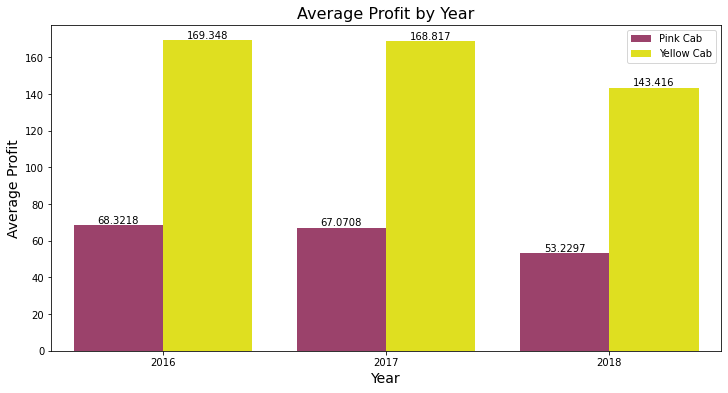

In [31]:
ig = plt.figure(figsize = (12,6))
ax = sns.barplot(x='Year', y='Profit',data = df2, hue = 'Company', ci=None)
plt.legend(loc = 'upper right')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel("Average Profit", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.title('Average Profit by Year', fontsize = 16)


In [32]:
df3 = df1[['City','Profit','Price/Km','Company']]
df3.head()

,City,Profit,Price/Km,Company
0,ATLANTA GA,57.3150,12.182266,Pink Cab
1,ATLANTA GA,281.2772,22.859870,Yellow Cab
2,ATLANTA GA,194.6480,18.614571,Yellow Cab
3,ATLANTA GA,23.6660,12.526904,Pink Cab
4,ATLANTA GA,253.9808,19.821330,Yellow Cab


Text(0.5, 1.0, 'Average Profit by City')

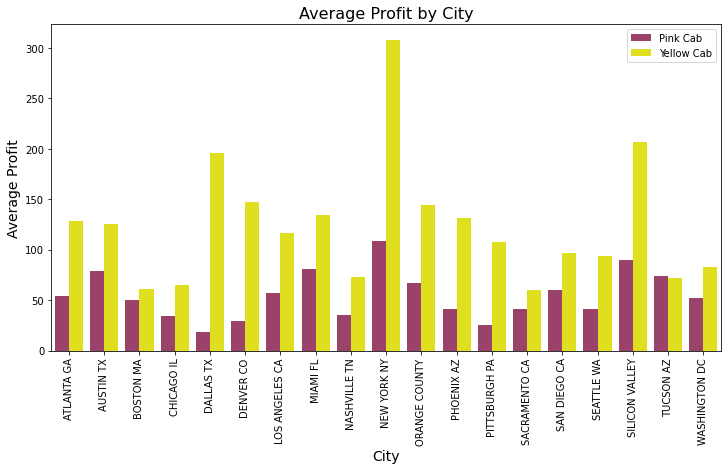

In [33]:
ig = plt.figure(figsize = (12,6))
ax = sns.barplot(x='City', y='Profit',data = df3, hue = 'Company',ci=None)
plt.legend(loc = 'upper right')
plt.ylabel("Average Profit", fontsize = 14)
plt.xticks(rotation=90)
plt.xlabel("City", fontsize = 14)
plt.title('Average Profit by City', fontsize = 16)

In [34]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit/km,Year,Price/Km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,1.882266,2016,12.182266
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,10.739870,2018,22.859870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,4.574571,2018,18.614571
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,0.826904,2016,12.526904
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,6.981330,2018,19.821330


In [35]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [36]:
df4 = df1.groupby(by='Company')[['KM Travelled']].sum().reset_index()
df4

,Company,KM Travelled
0,Pink Cab,1911073.11
1,Yellow Cab,6199417.47


Text(0, 0.5, 'Kilometers in Millions')

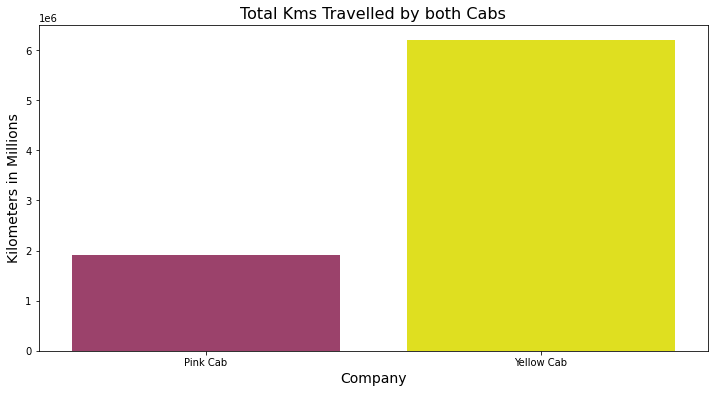

In [37]:
ig = plt.figure(figsize = (12,6))
ax = sns.barplot(x='Company', y='KM Travelled',data = df4,ci=None)
plt.title('Total Kms Travelled by both Cabs', fontsize = 16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Kilometers in Millions', fontsize=14)

In [38]:
df5 = df1.groupby(by='Company')[['Profit']].sum().reset_index()
df5

,Company,Profit
0,Pink Cab,5.307328e+06
1,Yellow Cab,4.402037e+07


Text(0, 0.5, 'Profit in Millions')

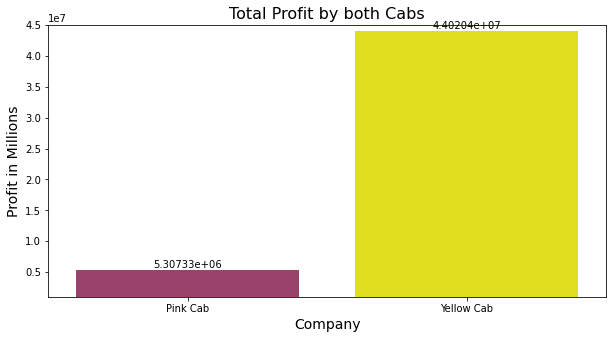

In [39]:
ig = plt.figure(figsize = (10,5))
ax = sns.barplot(x='Company', y='Profit',data = df5,ci=None)
ax.set_ylim(1000000,45000000)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total Profit by both Cabs', fontsize = 16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Profit in Millions', fontsize=14)

In [40]:
df6 = df1.groupby(by='Company')[['Gender']].value_counts().reset_index()
df6 = df6.rename(columns={0: 'Gender_Count'})
df6

,Company,Gender,Gender_Count
0,Pink Cab,Male,47231
1,Pink Cab,Female,37480
2,Yellow Cab,Male,158681
3,Yellow Cab,Female,116000


Text(0, 0.5, 'Number of Customers')

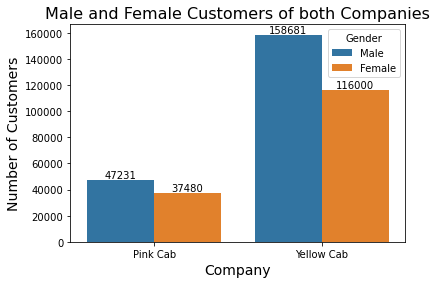

In [41]:
sns.set_palette(sns.color_palette('tab10'))

ax = sns.barplot(x='Company', y='Gender_Count',data = df6,ci=None, hue='Gender')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Male and Female Customers of both Companies', fontsize = 16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

In [42]:
df7 = df1.groupby(by='Company')[['Year']].value_counts().reset_index()
df7 = df7.rename(columns={0: 'Frequency'})
df7

,Company,Year,Frequency
0,Pink Cab,2017,30321
1,Pink Cab,2018,29310
2,Pink Cab,2016,25080
3,Yellow Cab,2017,98189
4,Yellow Cab,2018,94253
5,Yellow Cab,2016,82239


# MORE VISUALIZATONS CREATED USING TABLEAU ARE INCLUDED BELOW FOR ANALYSIS.

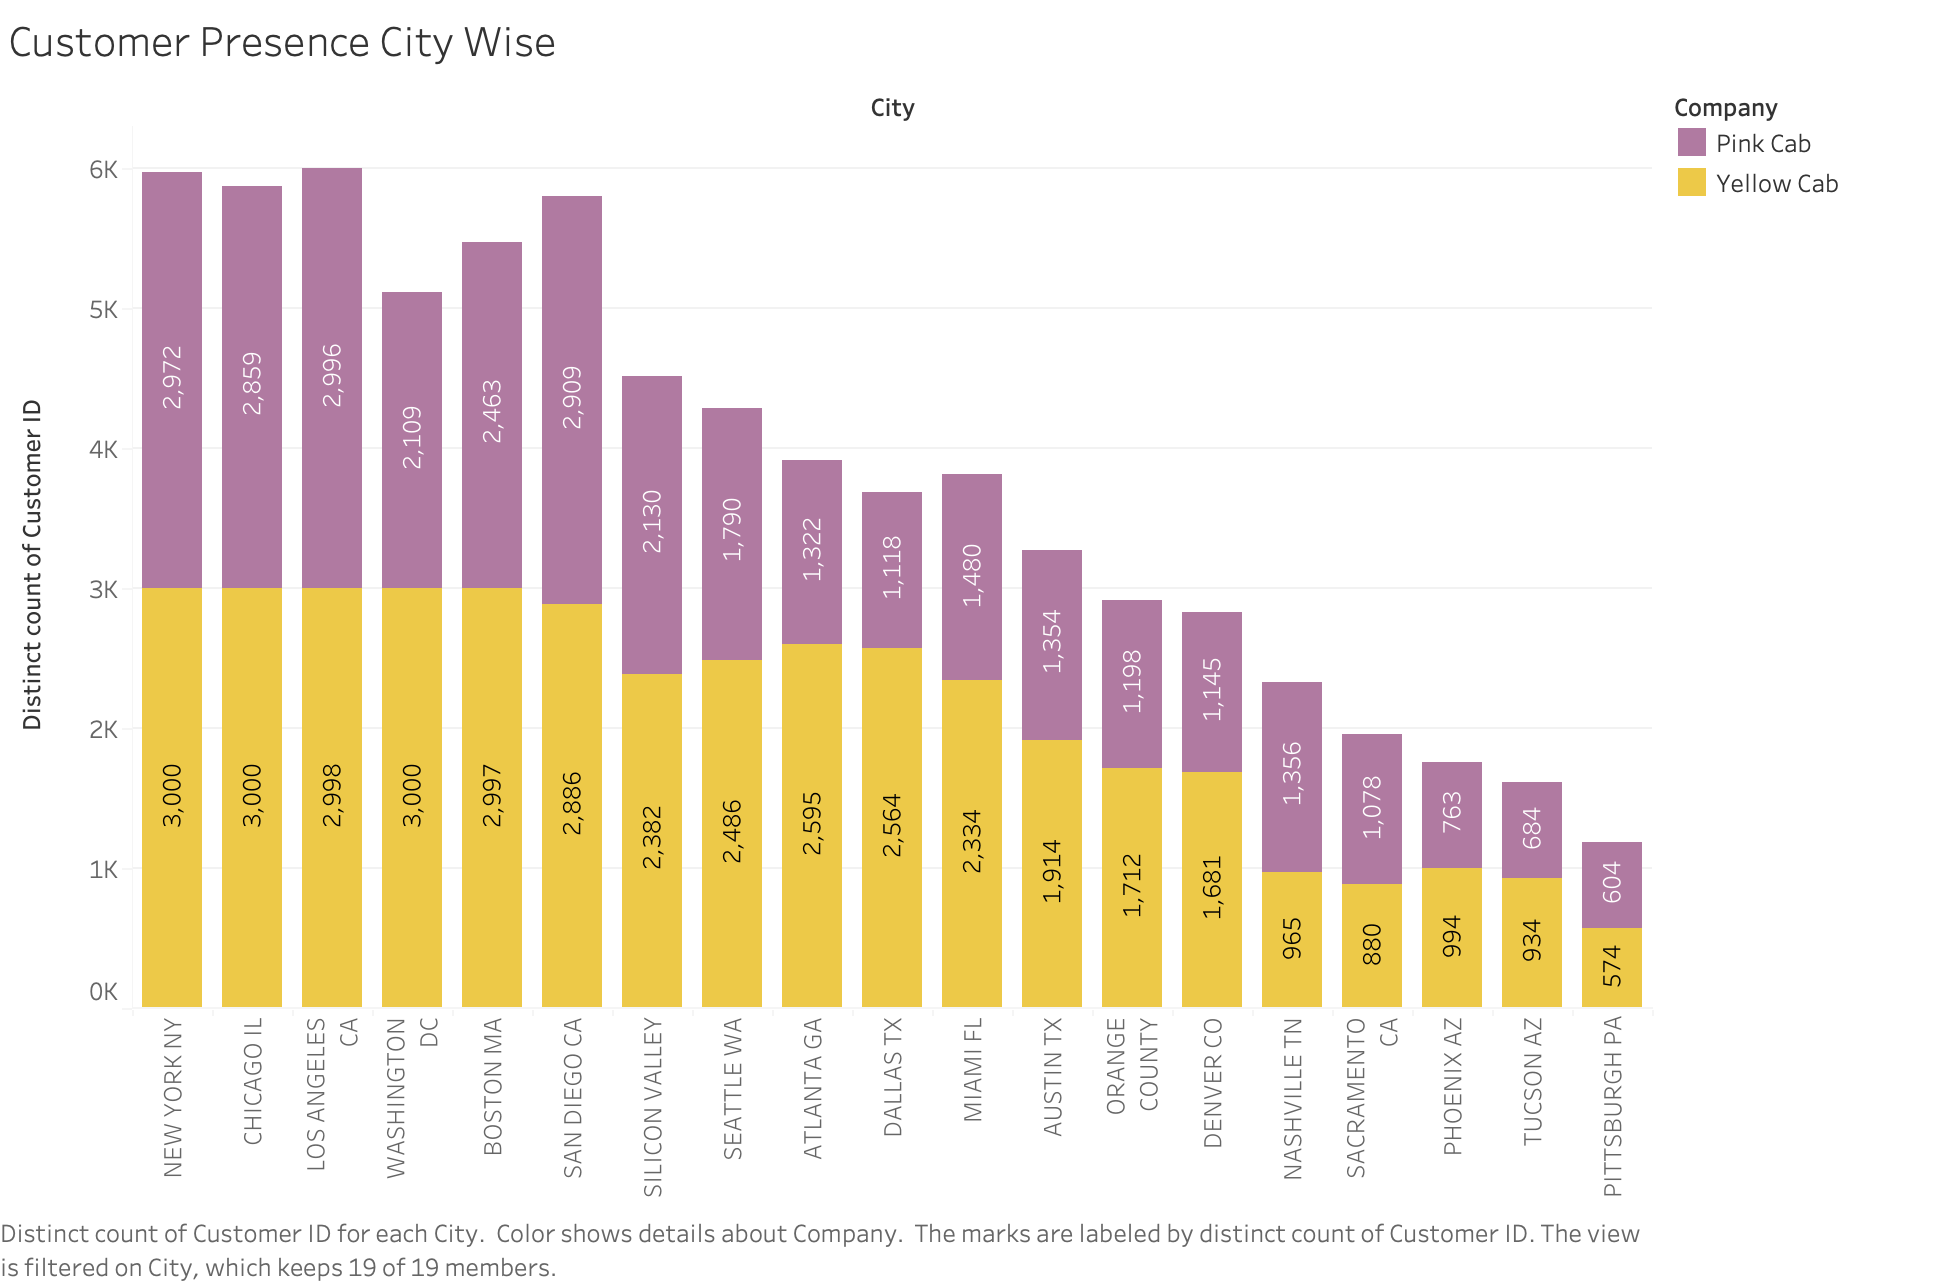

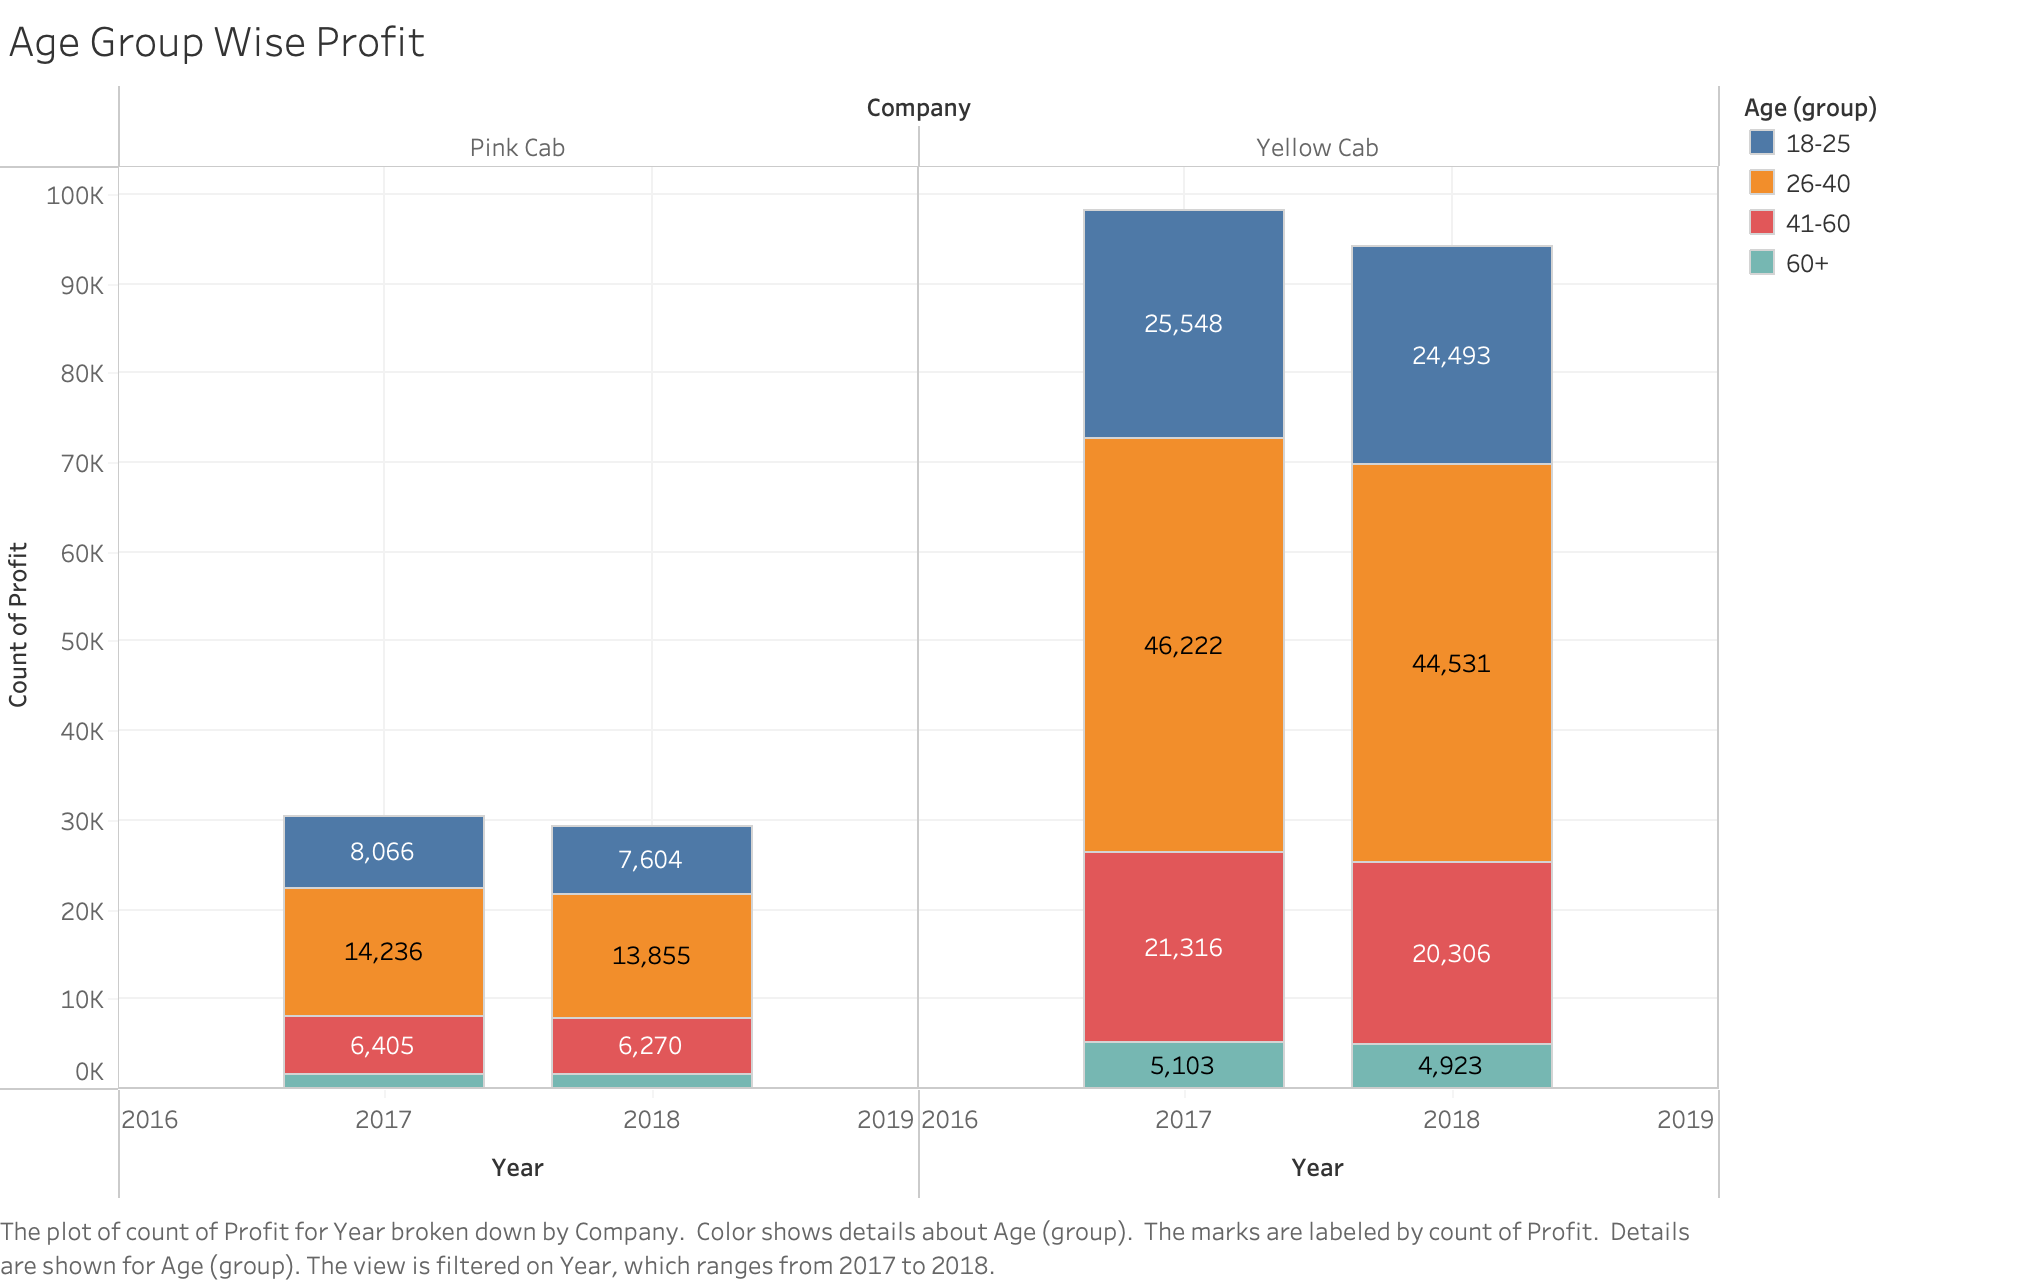

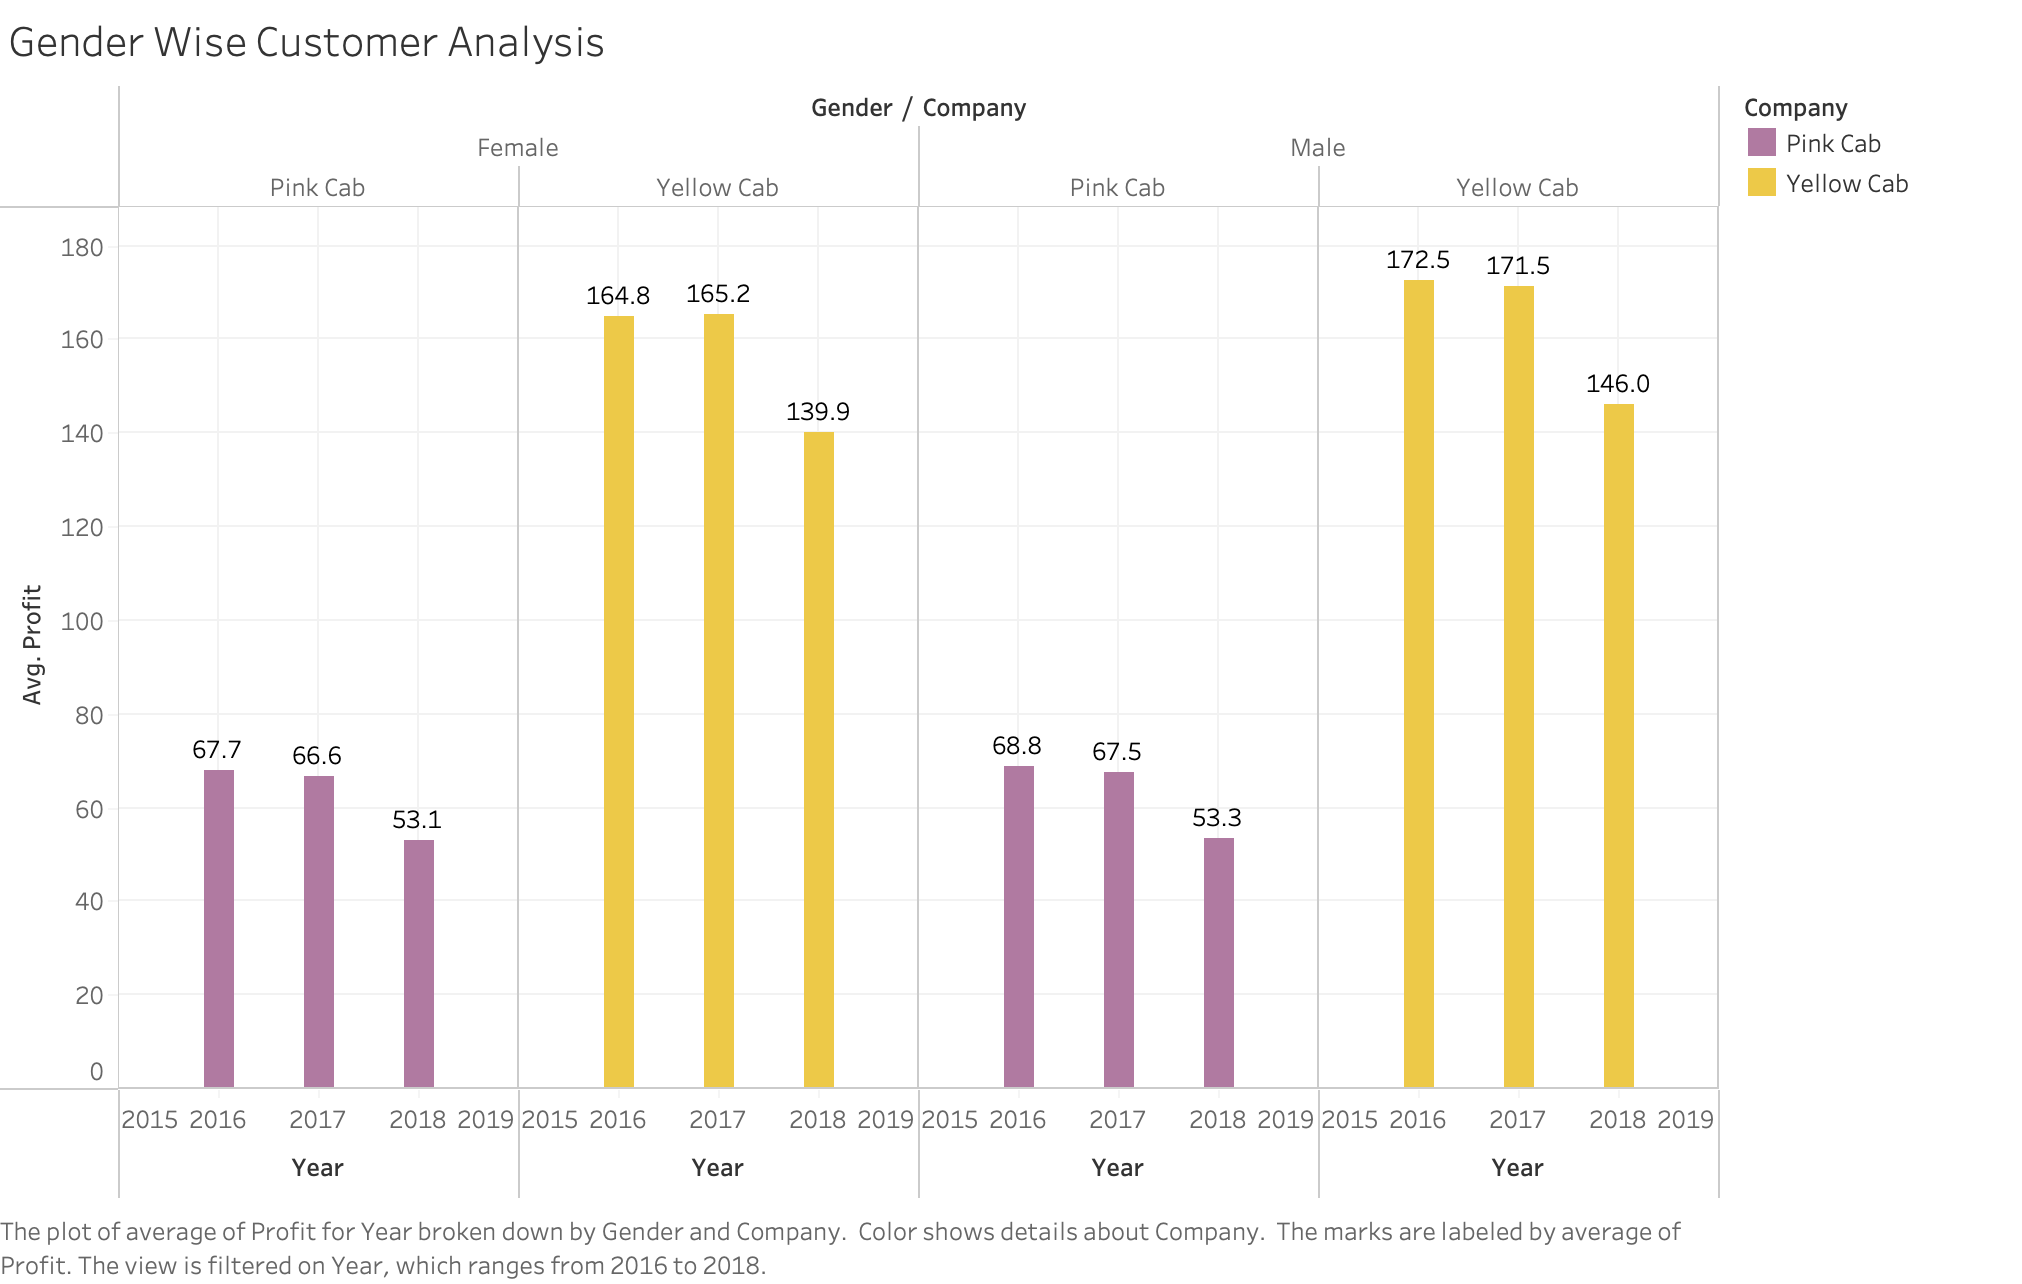

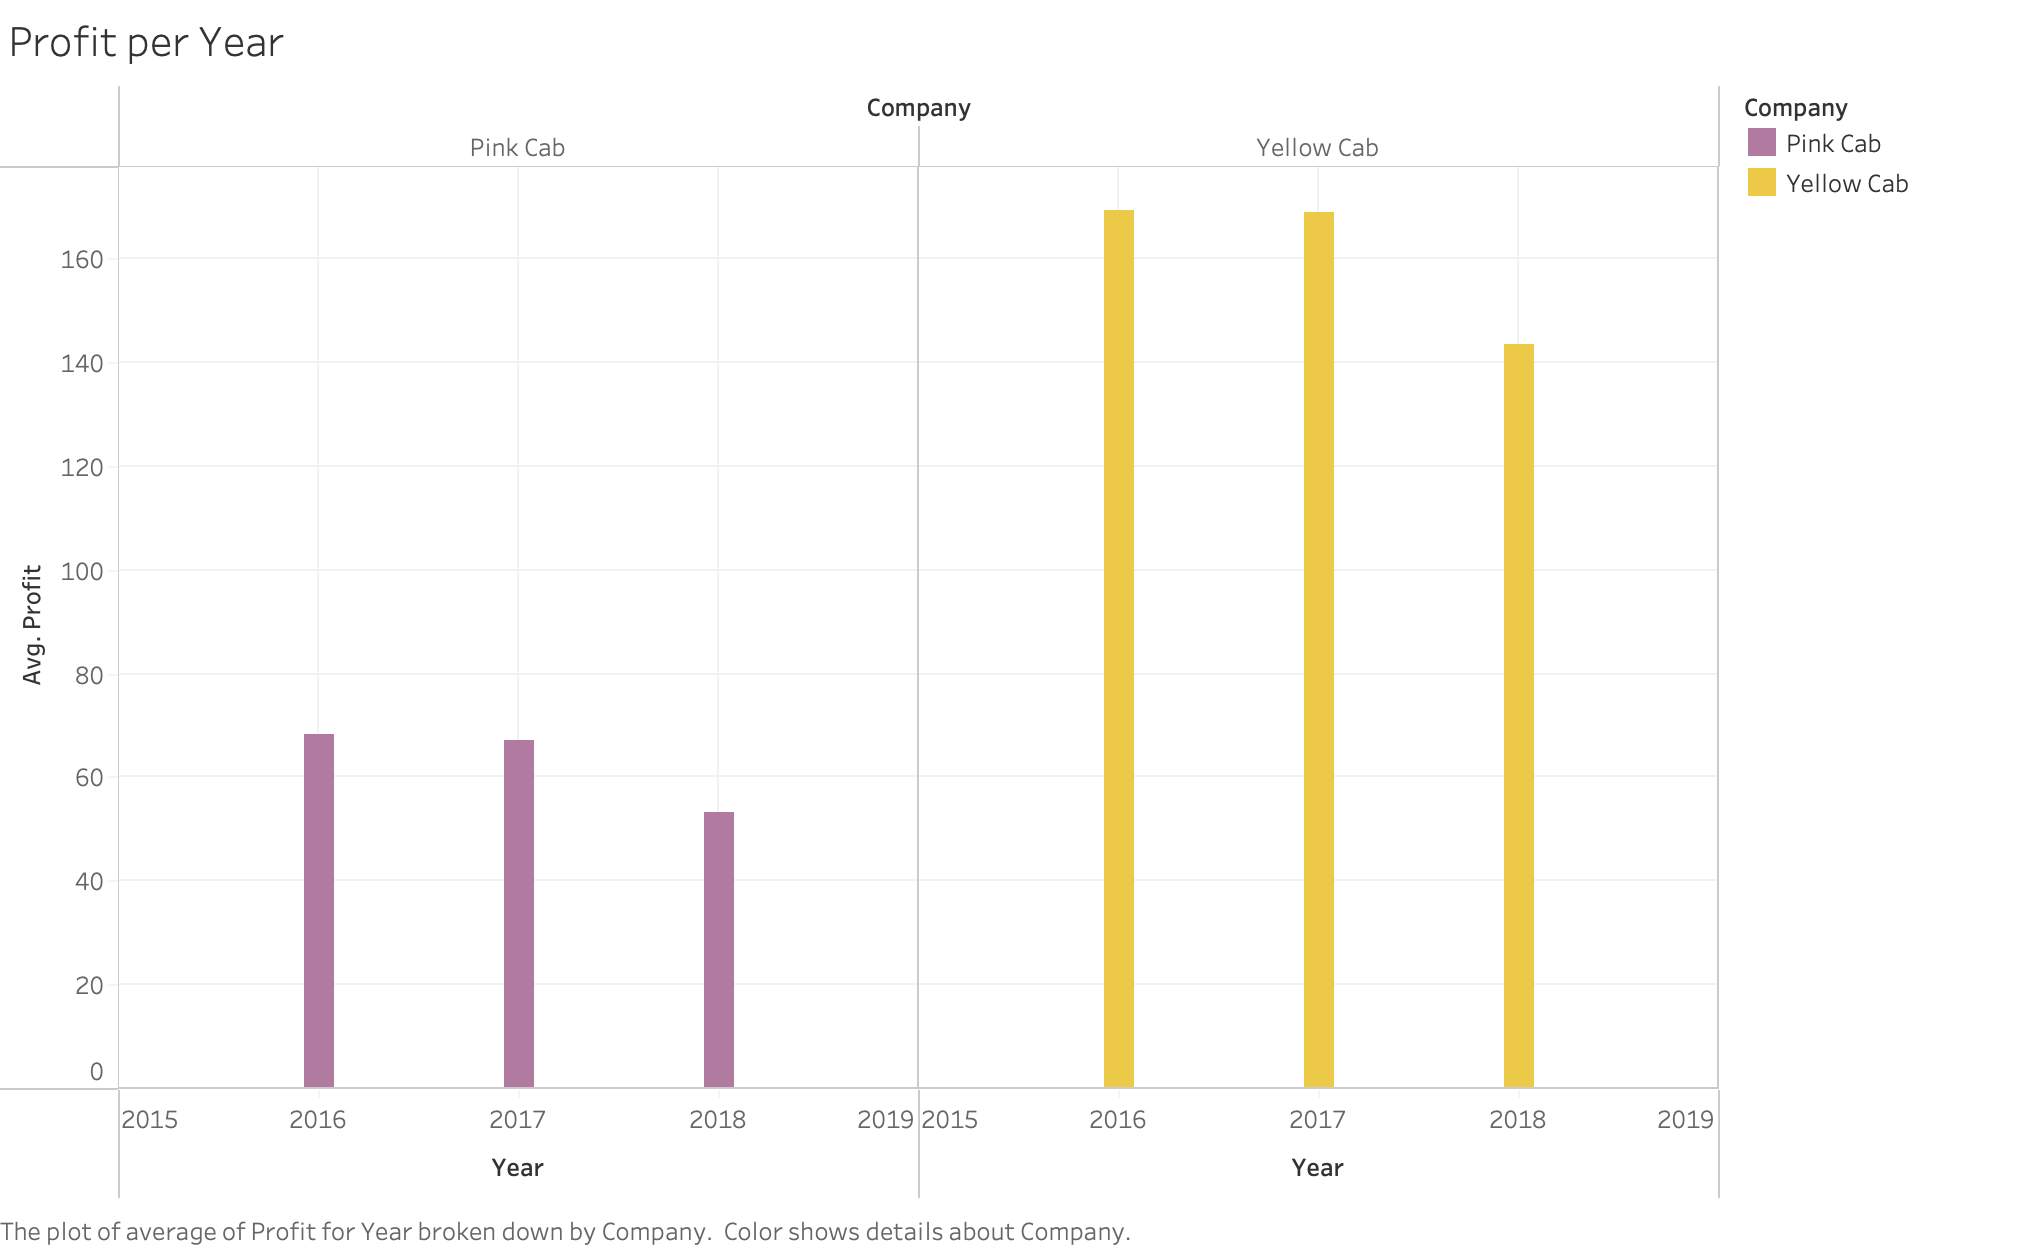

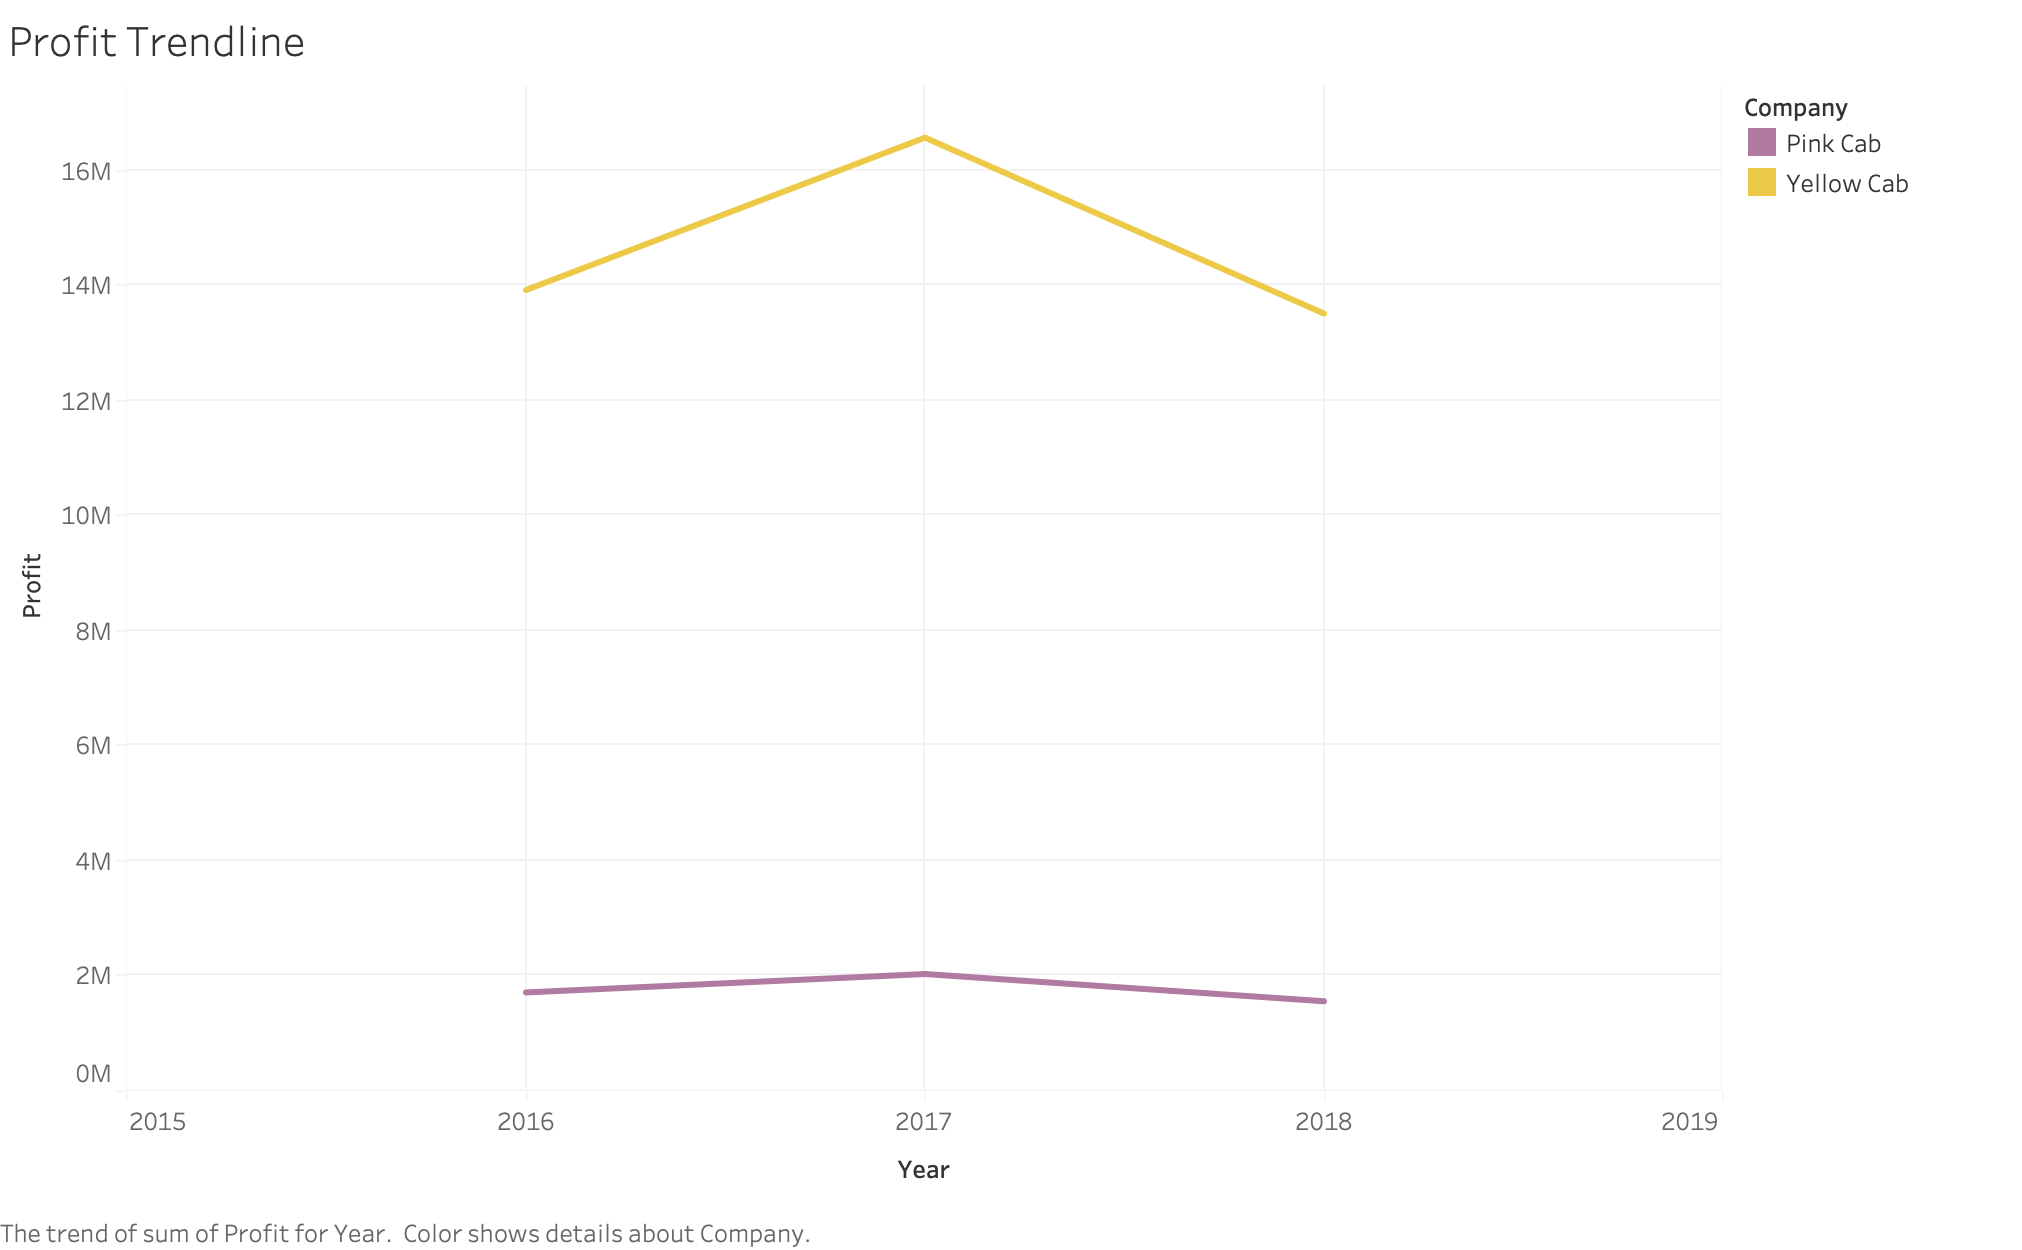

## FINDINGS AND RECOMMENDATION

<strong>Average Profit/km</strong>: Yellow Cab has more avg. profit/km than Pink Cab.<br /> <br />
<strong>Average Profit</strong>: Yellow Cab has more avg. profit in all three years than Pink Cab.<br /><br />
<strong>Average Profit by City</strong>: Yellow Cab earns more profit in all cities(with an exception of Tucson AZ) when compared to Pink Cab.<br /><br />
<strong>Total Kms Travelled by Both Cabs</strong>: Yellow Cab has travelled more than 3 times the distance travelled by Pink Cab. This shows Yellow Cab has more business.<br /><br />
<strong>Total Profit for Both Cabs</strong>: The graph shows that total profit for Yellow Cab is almost 8 times more than Pink Cab.<br /><br />
<strong>Male and Female Customers</strong>: The chart shows Yellow Cab has more male and female customers as compared to Pink Cab.<br /><br />
<strong>Customer Reach</strong>: Apart from four cities, Yellow Cab has more customer reach in each city as compared to Pink Cab.<br /><br />


### Hypothesis Answers
<strong>1</strong>: Does one cab firm dominate the other in terms of profit?<br />
<strong>A</strong>: Yes, Yellow Cab has earned 8 times more than Pink Cab. Hence, it dominates the market.<br /><br />
<strong>2</strong>: Does the profit come equally from all cities?<br />
<strong>A</strong>: No, New York generates the highest amount of profit for Yellow Cab, followed by Silicon Valley and Dallas. Similarly, New York, Silicon Valley, and Tucson generate the highest amount of profit for Pink Cab.<br /><br />
<strong>3</strong>: Is there a relationship between gender and cab firm selection?<br />
<strong>A</strong>: No, both males and females tend to select Yellow Cab more than Pink Cab. <br /><br />
<strong>4</strong>: Is customer reach equal for both firms?<br />
<strong>A</strong>: No, Yellow Cab has a better customer reach in almost all cities, while Pink Cab has a better customer reach in Pittsburgh, Sacramento, Nashville, and San Diego.<br /><br />

## THIS ANALYSIS RECOMMENDS YELLOW CAB FOR INVESTMENT.

# MODEL BUILDING USING LOGISTIC REGRESSION

In [43]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit/km,Year,Price/Km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,1.882266,2016,12.182266
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,10.739870,2018,22.859870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,4.574571,2018,18.614571
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,0.826904,2016,12.526904
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,6.981330,2018,19.821330


In [44]:
# CREATING NEW DATAFRAME, ML_DF FOR MACHINE LEARNING DATAFRAME

ml_df = df1.drop(['Transaction ID','Date of Travel','Cost of Trip','Payment_Mode','Population','Users','Profit','Profit/km','Year','Price/Km'],axis=1)
ml_df.head()

,Company,City,KM Travelled,Price Charged,Customer ID,Gender,Age,Income (USD/Month)
0,Pink Cab,ATLANTA GA,30.45,370.95,29290,Male,28,10813
1,Yellow Cab,ATLANTA GA,26.19,598.70,29290,Male,28,10813
2,Yellow Cab,ATLANTA GA,42.55,792.05,29290,Male,28,10813
3,Pink Cab,ATLANTA GA,28.62,358.52,27703,Male,27,9237
4,Yellow Cab,ATLANTA GA,36.38,721.10,27703,Male,27,9237


In [45]:
dummies = pd.get_dummies(ml_df.Gender)
dummies

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
359387,1,0
359388,1,0
359389,1,0
359390,1,0


In [46]:
ml_df = pd.concat([ml_df,dummies],axis = 1)
ml_df

,Company,City,KM Travelled,Price Charged,Customer ID,Gender,Age,Income (USD/Month),Female,Male
0,Pink Cab,ATLANTA GA,30.45,370.95,29290,Male,28,10813,0,1
1,Yellow Cab,ATLANTA GA,26.19,598.70,29290,Male,28,10813,0,1
2,Yellow Cab,ATLANTA GA,42.55,792.05,29290,Male,28,10813,0,1
3,Pink Cab,ATLANTA GA,28.62,358.52,27703,Male,27,9237,0,1
4,Yellow Cab,ATLANTA GA,36.38,721.10,27703,Male,27,9237,0,1
...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,WASHINGTON DC,38.40,668.93,51406,Female,29,6829,1,0
359388,Yellow Cab,WASHINGTON DC,3.57,67.60,51406,Female,29,6829,1,0
359389,Yellow Cab,WASHINGTON DC,23.46,331.97,51406,Female,29,6829,1,0
359390,Yellow Cab,WASHINGTON DC,27.60,358.23,51406,Female,29,6829,1,0


In [47]:
dummies2 = pd.get_dummies(ml_df.City)
dummies2


,ATLANTA GA,AUSTIN TX,BOSTON MA,CHICAGO IL,DALLAS TX,DENVER CO,LOS ANGELES CA,MIAMI FL,NASHVILLE TN,NEW YORK NY,ORANGE COUNTY,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
359388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
359389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
359390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
ml_df = pd.concat([ml_df,dummies2],axis = 1)
ml_df

,Company,City,KM Travelled,Price Charged,Customer ID,Gender,Age,Income (USD/Month),Female,Male,...,NEW YORK NY,ORANGE COUNTY,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC
0,Pink Cab,ATLANTA GA,30.45,370.95,29290,Male,28,10813,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Yellow Cab,ATLANTA GA,26.19,598.70,29290,Male,28,10813,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Yellow Cab,ATLANTA GA,42.55,792.05,29290,Male,28,10813,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Pink Cab,ATLANTA GA,28.62,358.52,27703,Male,27,9237,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Yellow Cab,ATLANTA GA,36.38,721.10,27703,Male,27,9237,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,WASHINGTON DC,38.40,668.93,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,0,0,1
359388,Yellow Cab,WASHINGTON DC,3.57,67.60,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,0,0,1
359389,Yellow Cab,WASHINGTON DC,23.46,331.97,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,0,0,1
359390,Yellow Cab,WASHINGTON DC,27.60,358.23,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
dummies3 = pd.get_dummies(ml_df.Company)
dummies3

,Pink Cab,Yellow Cab
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
359387,0,1
359388,0,1
359389,0,1
359390,0,1


In [50]:
ml_df = pd.concat([ml_df,dummies3],axis = 1)
ml_df

,Company,City,KM Travelled,Price Charged,Customer ID,Gender,Age,Income (USD/Month),Female,Male,...,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC,Pink Cab,Yellow Cab
0,Pink Cab,ATLANTA GA,30.45,370.95,29290,Male,28,10813,0,1,...,0,0,0,0,0,0,0,0,1,0
1,Yellow Cab,ATLANTA GA,26.19,598.70,29290,Male,28,10813,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Yellow Cab,ATLANTA GA,42.55,792.05,29290,Male,28,10813,0,1,...,0,0,0,0,0,0,0,0,0,1
3,Pink Cab,ATLANTA GA,28.62,358.52,27703,Male,27,9237,0,1,...,0,0,0,0,0,0,0,0,1,0
4,Yellow Cab,ATLANTA GA,36.38,721.10,27703,Male,27,9237,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,WASHINGTON DC,38.40,668.93,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,1,0,1
359388,Yellow Cab,WASHINGTON DC,3.57,67.60,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,1,0,1
359389,Yellow Cab,WASHINGTON DC,23.46,331.97,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,1,0,1
359390,Yellow Cab,WASHINGTON DC,27.60,358.23,51406,Female,29,6829,1,0,...,0,0,0,0,0,0,0,1,0,1


In [51]:
ml_df = ml_df.drop(['Company','Pink Cab','Customer ID','Income (USD/Month)','Gender','Female','City','ATLANTA GA'],axis=1)
ml_df

,KM Travelled,Price Charged,Age,Male,AUSTIN TX,BOSTON MA,CHICAGO IL,DALLAS TX,DENVER CO,LOS ANGELES CA,...,ORANGE COUNTY,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC,Yellow Cab
0,30.45,370.95,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.19,598.70,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,42.55,792.05,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,28.62,358.52,27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36.38,721.10,27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38.40,668.93,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
359388,3.57,67.60,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
359389,23.46,331.97,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
359390,27.60,358.23,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [52]:
X = ml_df.drop(['Yellow Cab'],axis=1)
X.head()

,KM Travelled,Price Charged,Age,Male,AUSTIN TX,BOSTON MA,CHICAGO IL,DALLAS TX,DENVER CO,LOS ANGELES CA,...,NEW YORK NY,ORANGE COUNTY,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC
0,30.45,370.95,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.19,598.70,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42.55,792.05,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.62,358.52,27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36.38,721.10,27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = ml_df['Yellow Cab']
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Yellow Cab, dtype: uint8

In [54]:
import sklearn
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
len(X_test)

71879

In [57]:
len(X_train)

287513

In [58]:
len(y_train)

287513

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
model.score(X_test,y_test)

0.8748174014663532

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

lin_r = LogisticRegression()
lin_scores = cross_val_score(lin_r,X,y,cv=3)
np.average(lin_scores)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7880644777253805

# The model can predict whether the person will choose Pink or Yellow Cab with approximately 79% accuracy on average.

## Confusion Matrix

Text(69.0, 0.5, 'Truth')

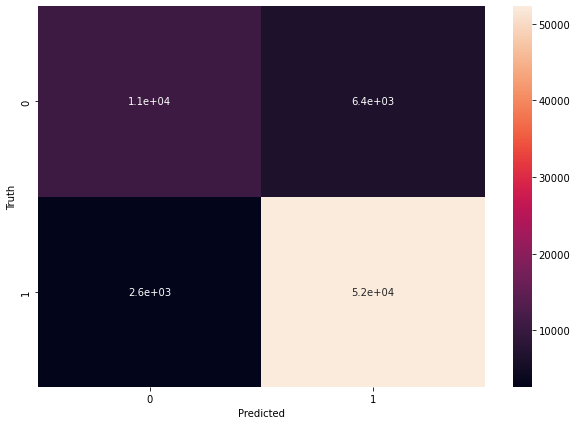

In [63]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')